<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/DATA_MINING/blob/main/audio/audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn


In [ ]:
!pip install librosa soundfile matplotlib seaborn pandas scikit-learn h2o tpot



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=6e141b94a761806c4751a9e69525a46b7211f23ab1834cd75f57204ec4d5d119
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=1cb27183dd7e505a8151cdb9045b1921bf850c7f7dfa6c2d845a028bd811d355
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built h2o stopit


In [ ]:
import librosa
audio_path = '/content/drive/MyDrive/sound/Chicago - British Woman.mp3'
audio, sr = librosa.load(audio_path, sr=None)  # sr (sampling rate) set to None to keep the original sr


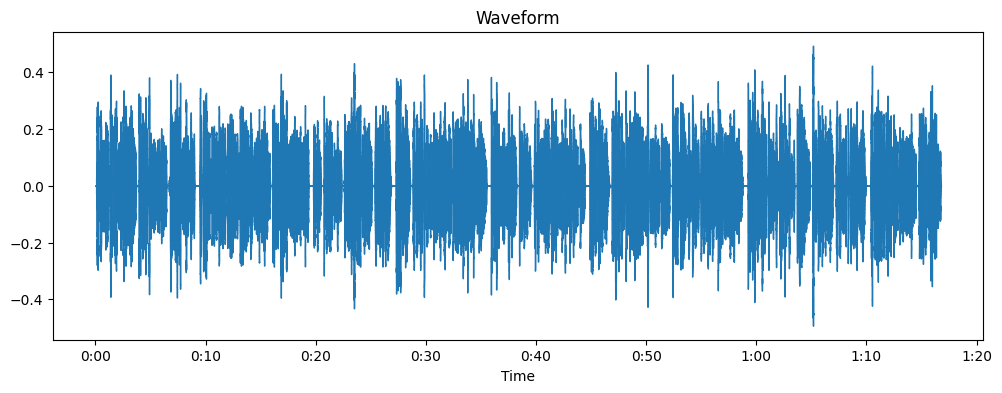

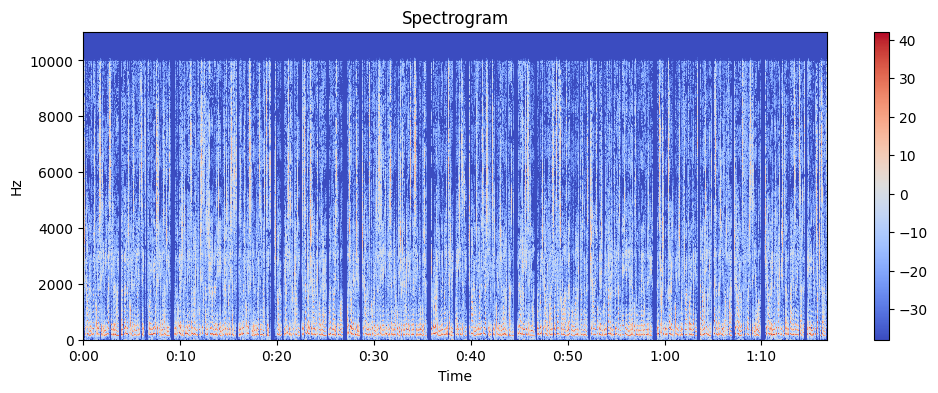

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# Waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Waveform')
plt.show()

# Spectrogram
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(12, 4))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectrogram')
plt.colorbar()
plt.show()


In [ ]:
def pad_audio(audio, desired_length):
    if len(audio) > desired_length:
        return audio[:desired_length]
    else:
        return np.pad(audio, (0, max(0, desired_length - len(audio))), "constant")

audio = pad_audio(audio, desired_length=1)  # Set desired_length as needed


In [ ]:
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mfccs_scaled = scaler.fit_transform(mfccs)


In [ ]:
!pip install numpy --upgrade
!pip install numba --upgrade



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 10.2 MB/s eta 0:00:00
  Attempting uninstal

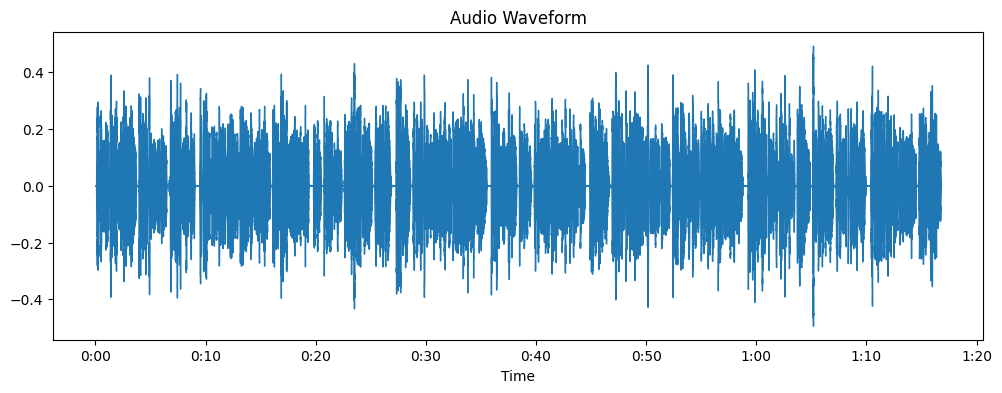

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load your MP3 file
file_path = '/content/drive/MyDrive/sound/Chicago - British Woman.mp3'
audio, sr = librosa.load(file_path, sr=None)  # Load with original sampling rate

# Display the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Audio Waveform')
plt.show()


In [ ]:
import librosa
import numpy as np



In [ ]:
file_paths = [
    '/content/drive/MyDrive/sound/Chicago - British Woman.mp3',
    ''
]
labels = [0, 1]  # 0 for British, 1 for American
features = []

for file_path in file_paths:
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    avg_mfccs = np.mean(mfccs, axis=1)
    features.append(avg_mfccs)

features = np.array(features)
labels = np.array(labels)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Splitting the dataset (this is just conceptual with such a small dataset)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=42)

# Train a classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2%}")


Model accuracy: 0.00%


In [ ]:
import librosa
import numpy as np

def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

        # Aggregating MFCCs (mean across time)
        mfccs_processed = np.mean(mfccs.T, axis=0)

    except Exception as e:
        print("Error encountered while parsing file: ", e)
        return None

    return mfccs_processed

# Paths to the files
file_paths = ['/content/drive/MyDrive/sound/Chicago - British Woman.mp3',
              '/content/drive/MyDrive/sound/Chicago - British Woman.mp3']

# Extract features from each audio file
features = np.array([extract_features(path) for path in file_paths])


In [ ]:
# Labels: 0 for British, 1 for American
labels = np.array([0, 1])


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset - this is just a formality here with 2 samples
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model (Note: With such a small dataset, this is just for demonstration)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Since our dataset is extremely small, this evaluation won't be meaningful
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2%}")


Model accuracy: 0.00%


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-bb3ef10e28af>:6: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(features)


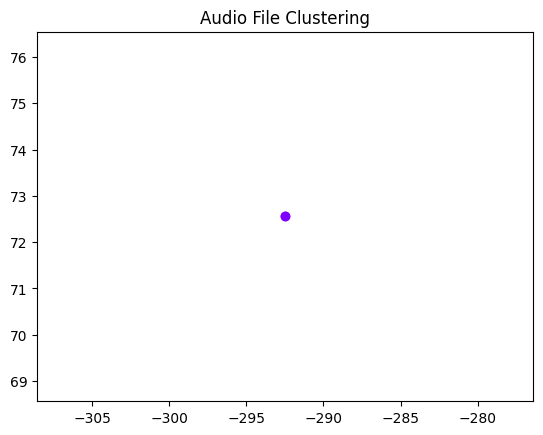

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We'll cluster the extracted features
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)

# Since we only have two features, we can also visualize them
plt.scatter(features[:, 0], features[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title("Audio File Clustering")
plt.show()


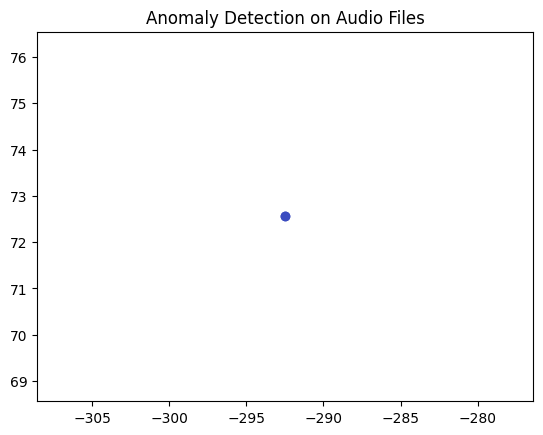

In [ ]:
from sklearn.ensemble import IsolationForest

# Fit the model
iso_forest = IsolationForest(random_state=42)
iso_forest.fit(features)

# Predictions
anomalies = iso_forest.predict(features)

# Visualize
plt.scatter(features[:, 0], features[:, 1], c=anomalies, cmap='coolwarm')
plt.title("Anomaly Detection on Audio Files")
plt.show()


In [ ]:
!pip install tpot


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'features' is an array of extracted features from your audio files
# and 'labels' is an array of your labels (e.g., 0 and 1 for two categories)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(features, labels)

# Predicting the same data (for demonstration as we don't have a test set)
predictions = classifier.predict(features)



In [ ]:
!pip install librosa soundfile




In [ ]:
import librosa
import soundfile as sf
import numpy as np

def change_speed(audio, rate, sr):
    return librosa.effects.time_stretch(audio, rate)

def add_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio))
    augmented_audio = audio + noise_level * noise
    # Normalizing to [-1, 1]
    return np.clip(augmented_audio, -1, 1)

def change_pitch(audio, sr, n_steps):
    return librosa.effects.pitch_shift(audio, sr, n_steps)

def time_shift(audio, shift_max, sr):
    shift = np.random.randint(sr * shift_max)
    return np.roll(audio, shift)



In [ ]:
def change_speed(audio, rate):
    return librosa.effects.time_stretch(audio, rate)



In [ ]:
!pip install librosa --upgrade


In [ ]:
def change_speed(audio, rate):
    return librosa.effects.time_stretch(audio, rate)


In [ ]:
import librosa
print(librosa.__version__)


0.10.1


In [ ]:
def change_speed_basic(audio, sr, rate):
    new_sr = int(sr * rate)
    return librosa.resample(audio, orig_sr=sr, target_sr=new_sr)


In [ ]:
for file_path in file_paths:
    audio, sr = librosa.load(file_path, sr=None)

    for i in range(5):  # Create 5 augmented versions of each file
        # Change speed
        rate = np.random.uniform(0.9, 1.1)  # Random speed rate between 0.9 and 1.1
        audio_aug = change_speed_basic(audio, sr, rate)
        sf.write(file_path.replace('.mp3', f'_speed_{i}.wav'), audio_aug, sr)
        # ... continue with other augmentations ...


In [ ]:
def change_pitch(audio, sr, n_steps):
    return librosa.effects.pitch_shift(audio, sr, n_steps)


In [ ]:
def change_pitch(audio, sr, n_steps):
    return librosa.effects.pitch_shift(audio, sr, n_steps)


In [ ]:
help(librosa.effects.pitch_shift)



Help on function pitch_shift in module librosa.effects:

pitch_shift(y: numpy.ndarray, *, sr: float, n_steps: float, bins_per_octave: int = 12, res_type: str = 'soxr_hq', scale: bool = False, **kwargs: Any) -> numpy.ndarray
    Shift the pitch of a waveform by ``n_steps`` steps.
    
    A step is equal to a semitone if ``bins_per_octave`` is set to 12.
    
    Parameters
    ----------
    y : np.ndarray [shape=(..., n)]
        audio time series. Multi-channel is supported.
    
    sr : number > 0 [scalar]
        audio sampling rate of ``y``
    
    n_steps : float [scalar]
        how many (fractional) steps to shift ``y``
    
    bins_per_octave : int > 0 [scalar]
        how many steps per octave
    
    res_type : string
        Resample type. By default, 'soxr_hq' is used.
    
        See `librosa.resample` for more information.
    
    scale : bool
        Scale the resampled signal so that ``y`` and ``y_hat`` have approximately
        equal total energy.
    
    **kw